In [2]:
import pandas as pd
import numpy as np
#visuals
import matplotlib.pyplot as plt
import seaborn as sns
#db
import psycopg2 as psy
#for decoding the IP's location
import geoip2.database
import pycountry_convert as pc

In [3]:
merged_df = pd.read_csv('/Users/sa12/Documents/Repositories/The-CyberChase/DATA/feb5-12_merged.csv')

In [4]:
reader = geoip2.database.Reader('/Users/sa12/Documents/Repositories/The-CyberChase/DATA/GeoLite2-City.mmdb')
# Build location info
locations = []

for ip in merged_df['Src IP']:
    try:
        response = reader.city(ip)
        country = response.country.name or "Unknown Country"
        city = response.city.name or "Unknown City"

        location_str = f"{country}"
    except Exception as e:
        location_str = f"Error: {e}"

    locations.append(location_str)

# Add to DataFrame
merged_df['Location'] = locations

In [45]:
merged_df['Label Code'] = merged_df['Label'].map({'ddospot':1,'cowrie':2,'adbhoney':3,'log4pot':4,'ciscoasa':5,'elasticpot':6,'mailoney':7})
# Convert to datetime
times = pd.to_datetime(merged_df['Timestamp'])
# Extract time and convert to float (hours)
merged_df['float_time'] = times.dt.hour + times.dt.minute / 60 + times.dt.second / 3600
#convert IPs into ints
merged_df['Src #'] = merged_df['Src IP'].str.replace('.', '', regex=False).astype(int)
merged_df['Dst #'] = merged_df['Dst IP'].str.replace('.', '', regex=False).astype(int)
#create frame
merged_df_misc = merged_df[['Src #',
'Src Port',
'Dst #',
'Dst Port',
'Protocol',
'float_time',
'Label Code']]

<Axes: xlabel='float_time', ylabel='Count'>

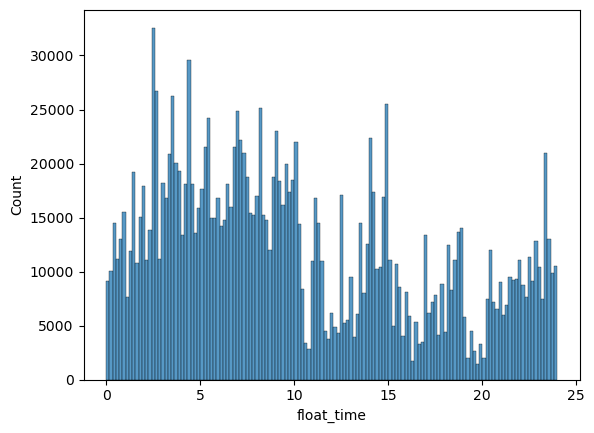

In [19]:
counts = merged_df['float_time'].value_counts().to_frame()
sns.histplot(merged_df['float_time'])

In [42]:
# Group by the three columns and count the number of rows in each group
grouped_counts = merged_df.groupby(['Timestamp', 'Src #']).size().reset_index(name='Count')

# Display the result
grouped_counts.describe()

,Src #,Count
count,5.799620e+05,579962.000000
mean,2.381660e+10,2.998843
std,4.652972e+10,5.540170
min,5.710000e+02,1.000000
25%,7.967152e+08,1.000000
50%,3.713762e+09,1.000000
75%,1.882089e+10,3.000000
max,2.232522e+11,898.000000


In [59]:
greater_than_zero_counts = {}
total_rows = len(merged_df)
for column in merged_df.columns:
    # Check if the column is numeric to avoid errors
    if pd.api.types.is_numeric_dtype(merged_df[column]):
        count = (merged_df[column] > 0).sum()
        greater_than_zero_counts[column] = count
greater_than_zero_counts = pd.DataFrame(greater_than_zero_counts.items(), columns=['Feature', 'Value'])
greater_than_zero_counts 

,Feature,Value
0,Src Port,1739187
1,Dst Port,1739215
2,Protocol,1739215
3,Flow Duration,1738383
4,Total Fwd Packet,1739215
...,...,...
79,day,1739215
80,Label Code,1738997
81,float_time,1739198
82,Src #,1739215


<Axes: >

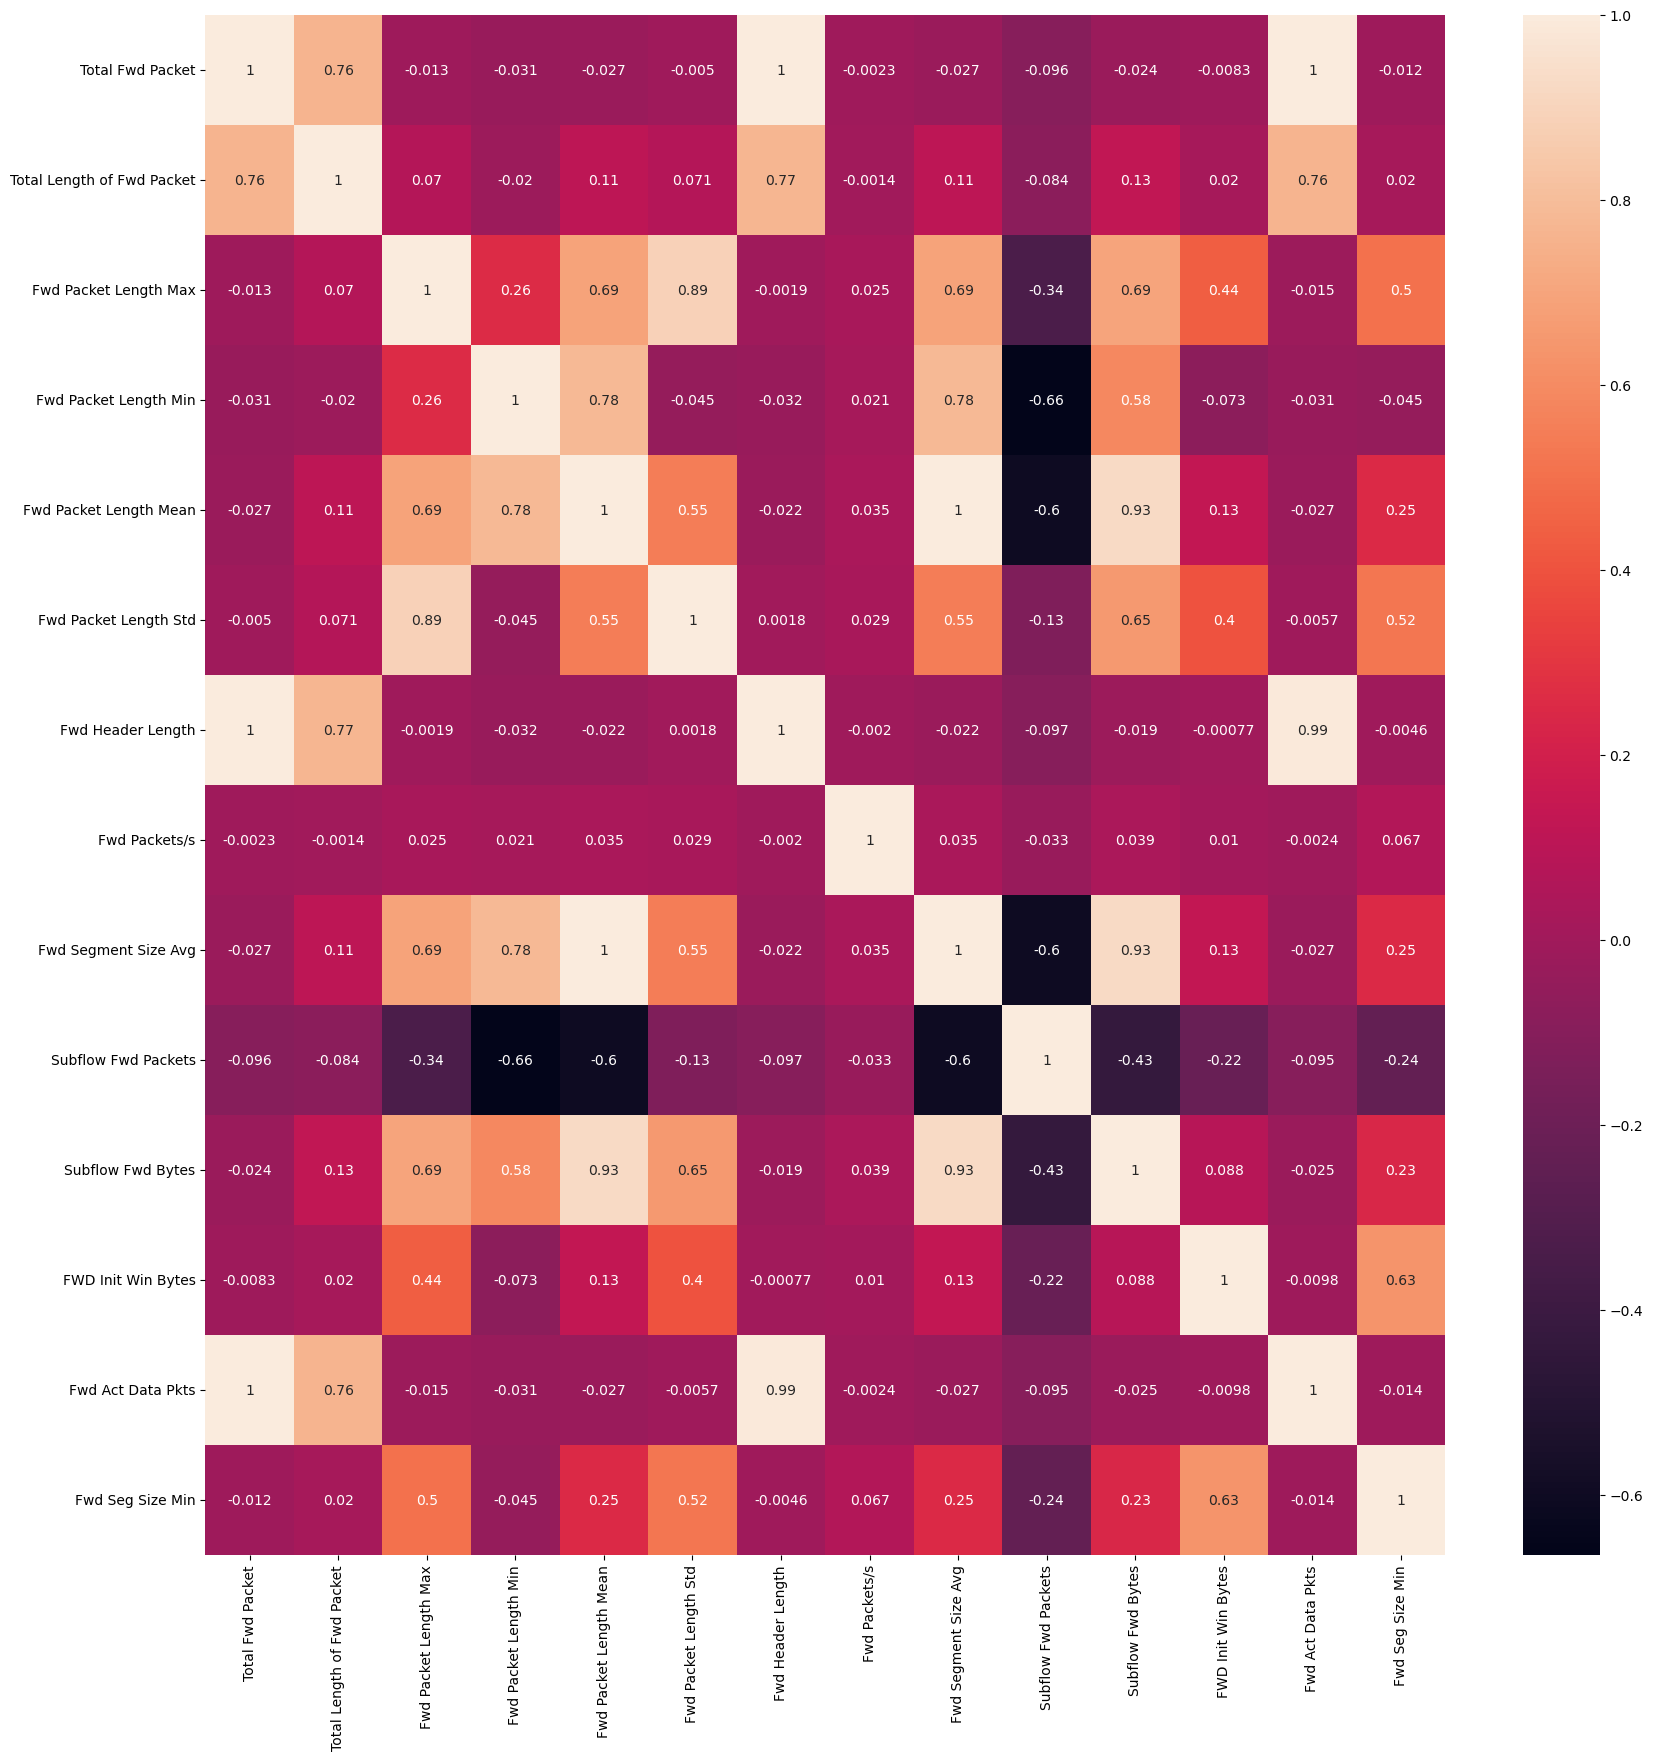

In [24]:
merged_Fwd = merged_df[['Total Fwd Packet',
                'Total Length of Fwd Packet',
                'Fwd Packet Length Max', 
                'Fwd Packet Length Min', 
                'Fwd Packet Length Mean', 
                'Fwd Packet Length Std',  
                'Fwd Header Length', 
                'Fwd Packets/s', 
                'Fwd Segment Size Avg', 
                'Subflow Fwd Packets', 
                'Subflow Fwd Bytes', 
                'FWD Init Win Bytes', 
                'Fwd Act Data Pkts', 
                'Fwd Seg Size Min']]
plt.figure(figsize=(20,20))
sns.heatmap(merged_Fwd.corr(), annot=True)

<Axes: >

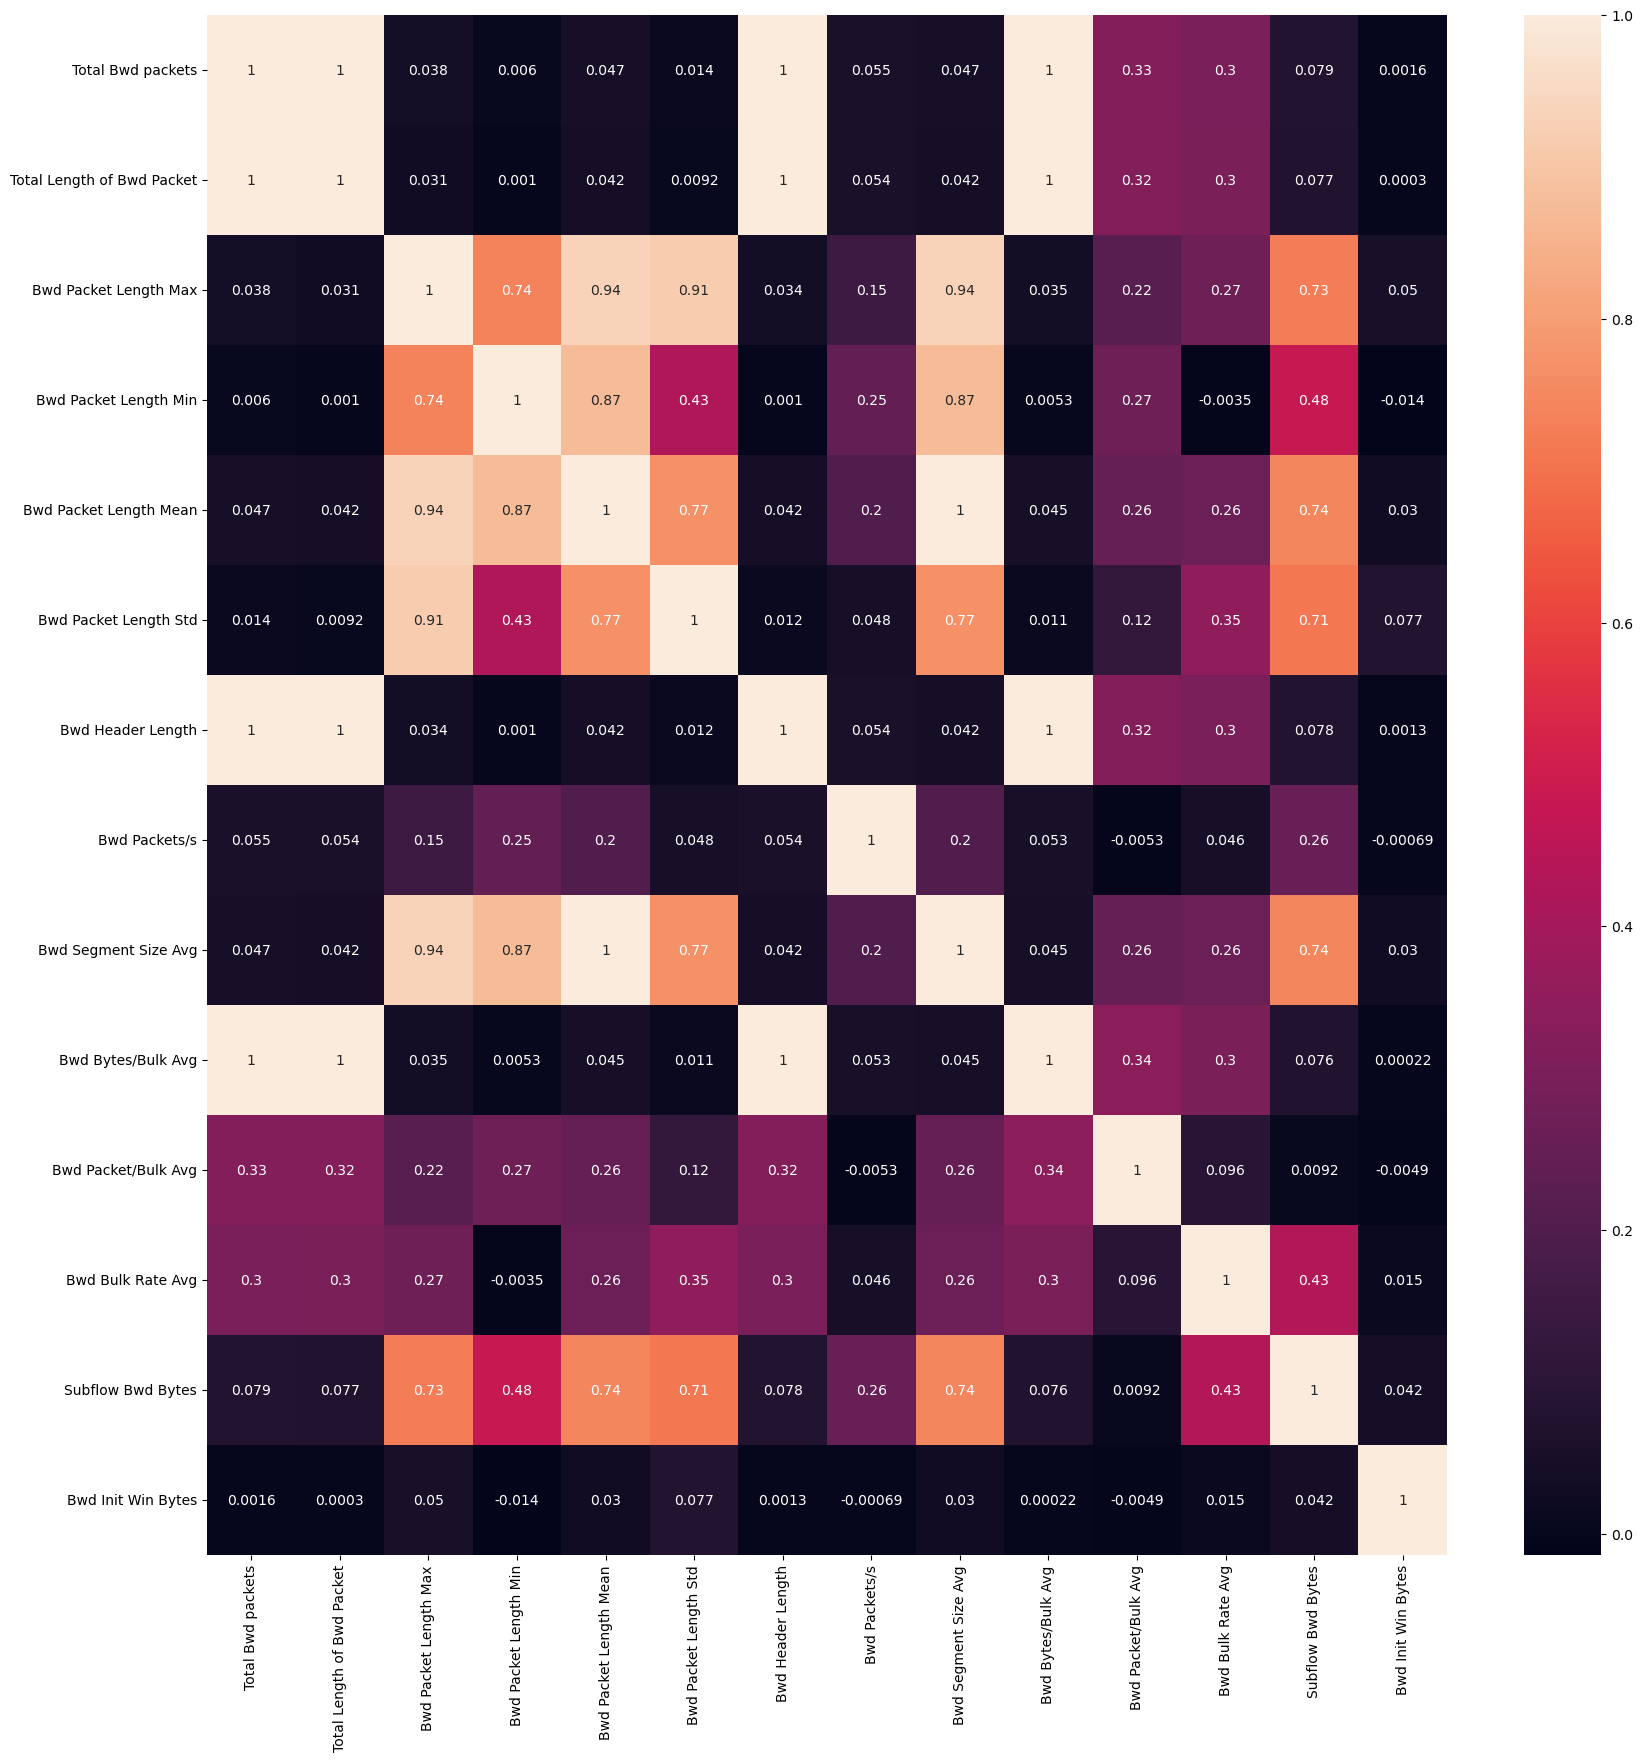

In [58]:
merged_Bwd = merged_df[['Total Bwd packets', 
      'Total Length of Bwd Packet', 
      'Bwd Packet Length Max', 
      'Bwd Packet Length Min', 
      'Bwd Packet Length Mean', 
      'Bwd Packet Length Std',   
      'Bwd Header Length',
      'Bwd Packets/s', 
      'Bwd Segment Size Avg', 
      'Bwd Bytes/Bulk Avg', 
      'Bwd Packet/Bulk Avg', 
      'Bwd Bulk Rate Avg', 
      'Subflow Bwd Bytes', 
      'Bwd Init Win Bytes']]
plt.figure(figsize=(20,20))
sns.heatmap(merged_Bwd.corr(), annot=True)


In [54]:
merged_Fwd = merged_df[['Total Fwd Packet',
                'Total Length of Fwd Packet',
                'Fwd Packet Length Max', 
                'Fwd Packet Length Min', 
                'Fwd Packet Length Mean', 
                'Fwd Packet Length Std',  
                'Fwd Header Length', 
                'Fwd Packets/s', 
                'Fwd Segment Size Avg', 
                'Subflow Fwd Packets', 
                'Subflow Fwd Bytes', 
                'FWD Init Win Bytes', 
                'Fwd Act Data Pkts', 
                'Fwd Seg Size Min',
                'Continents']]
plt.figure(figsize=(20,20))
sns.heatmap(merged_Fwd.corr(),annot=True)

ValueError: could not convert string to float: 'Asia'

<Figure size 2000x2000 with 0 Axes>

In [57]:
merged_df['Total Length of Fwd Packet'].value_counts()

Total Length of Fwd Packet
16.0       1225182
48.0        212041
24.0        105086
0.0          19583
32.0         15779
            ...   
39128.0          1
38864.0          1
38760.0          1
38496.0          1
22040.0          1
Name: count, Length: 4983, dtype: int64

<Axes: >

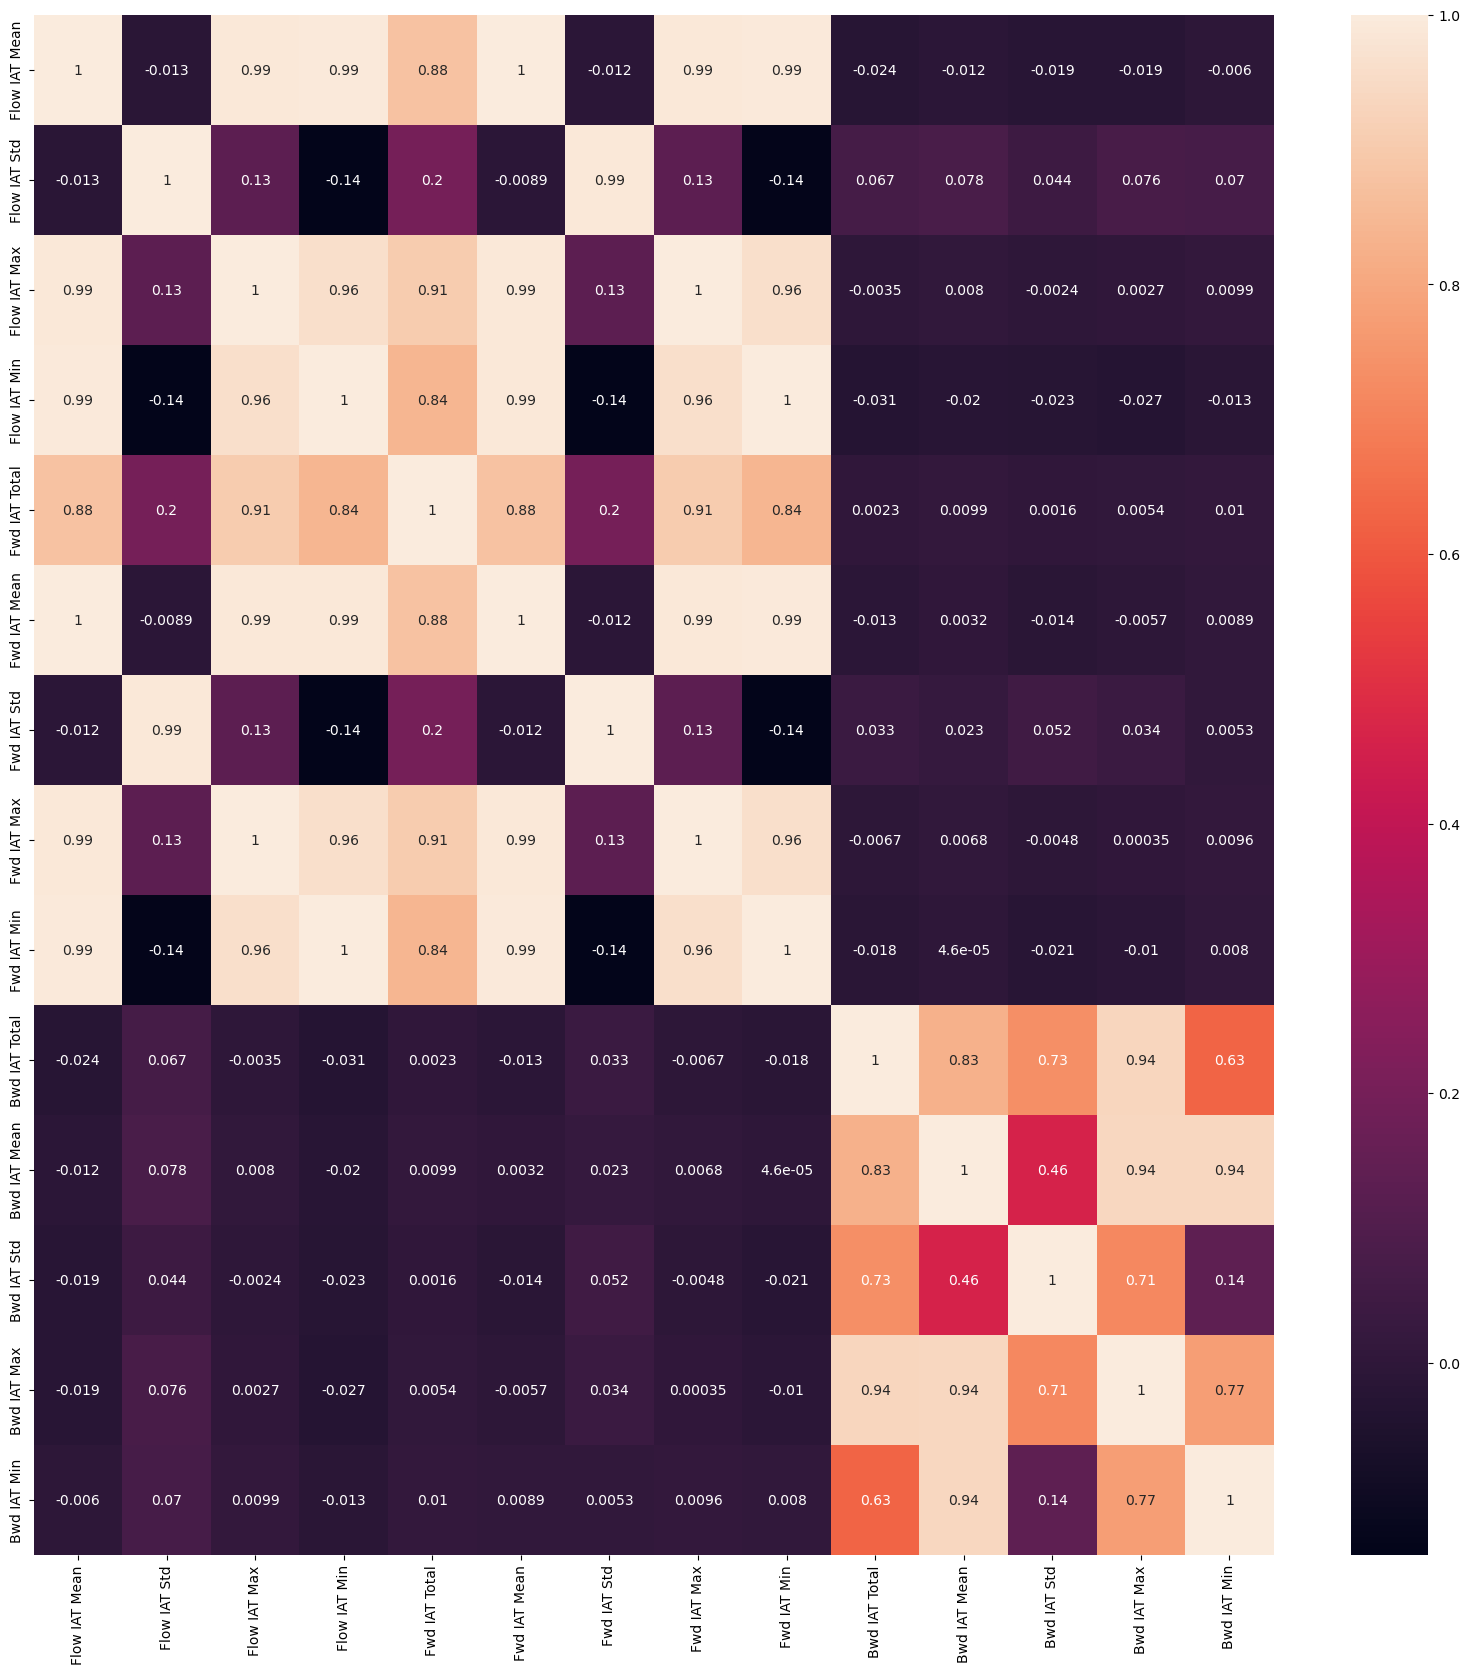

In [46]:
merged_IAT = merged_df[['Flow IAT Mean', 
                 'Flow IAT Std', 
                 'Flow IAT Max', 
                 'Flow IAT Min', 
                 'Fwd IAT Total', 
                 'Fwd IAT Mean', 
                 'Fwd IAT Std', 
                 'Fwd IAT Max', 
                 'Fwd IAT Min', 
                 'Bwd IAT Total', 
                 'Bwd IAT Mean', 
                 'Bwd IAT Std',
                 'Bwd IAT Max', 
                 'Bwd IAT Min']]
plt.figure(figsize=(20,20))
sns.heatmap(merged_IAT.corr(),annot=True)

In [90]:
merged_df['PSH Flag Count'].value_counts()

PSH Flag Count
0      1724740
2         4875
1         2782
12        1415
7         1309
        ...   
167          1
165          1
540          1
538          1
68           1
Name: count, Length: 94, dtype: int64

In [29]:
DDoS = merged_df[merged_df['Label Code'] == 1]
not_DDoS = merged_df[merged_df['Label Code'] != 1]


In [66]:
DDoS.groupby('Label')['Total Length of Fwd Packet'].value_counts()

Label    Total Length of Fwd Packet
ddospot  16.0                          1225040
         48.0                           212008
         24.0                           104301
         32.0                            15776
         8.0                             13281
                                        ...   
         139656.0                            1
         139776.0                            1
         140024.0                            1
         140416.0                            1
         141064.0                            1
Name: count, Length: 4354, dtype: int64

In [52]:
DDoS['Flow IAT Std'].value_counts()

Flow IAT Std
0.000000e+00    1429090
2.687006e+02         52
2.771859e+02         51
2.538513e+02         47
5.077027e+02         44
                 ...   
4.559020e+07          1
1.546923e+07          1
4.757332e+06          1
1.711936e+07          1
1.711859e+03          1
Name: count, Length: 263743, dtype: int64

In [53]:
not_DDoS['Flow IAT Std'].value_counts()

Flow IAT Std
0.000000e+00    13874
7.071068e-01       26
7.424621e+01       12
4.030509e+01       11
7.990307e+01       10
                ...  
1.096936e+05        1
2.360968e+05        1
1.018269e+05        1
1.643516e+06        1
2.674169e+02        1
Name: count, Length: 19140, dtype: int64

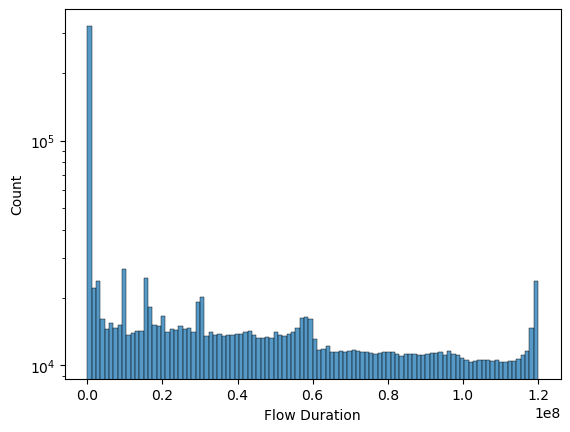

In [33]:
sns.histplot(DDoS['Flow Duration'])
plt.yscale('log')

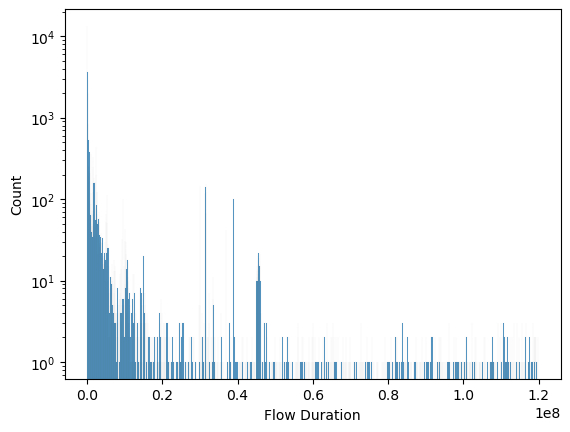

In [34]:
sns.scatterplot(not_DDoS, x ='Flow Duration', y = '')

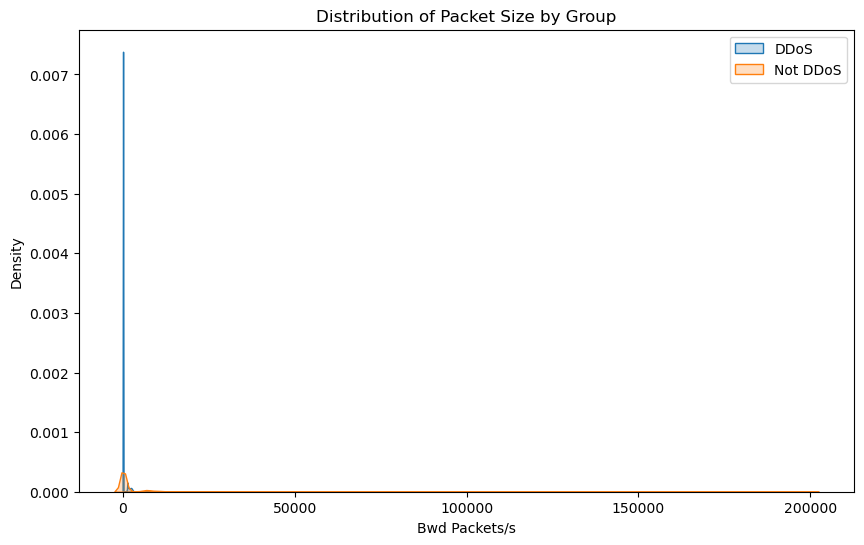

In [38]:
plt.figure(figsize=(10, 6))
sns.kdeplot(DDoS['Bwd Packets/s'], label='DDoS', fill=True)
sns.kdeplot(not_DDoS['Bwd Packets/s'], label='Not DDoS', fill=True)
plt.title('Distribution of Packet Size by Group')
plt.legend()
plt.show()

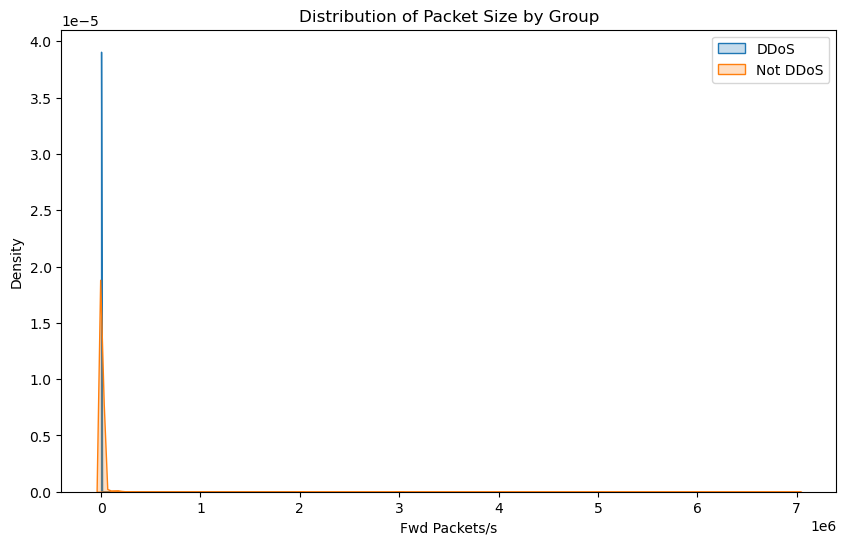

In [39]:
plt.figure(figsize=(10, 6))
sns.kdeplot(DDoS['Fwd Packets/s'], label='DDoS', fill=True)
sns.kdeplot(not_DDoS['Fwd Packets/s'], label='Not DDoS', fill=True)
plt.title('Distribution of Packet Size by Group')
plt.legend()
plt.show()

/var/folders/t3/tq1z8cy535bck4xjwkvc0_xh0000gn/T/ipykernel_82538/2899184473.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(DDoS['PSH Flag Count'], label='DDoS', fill=True)


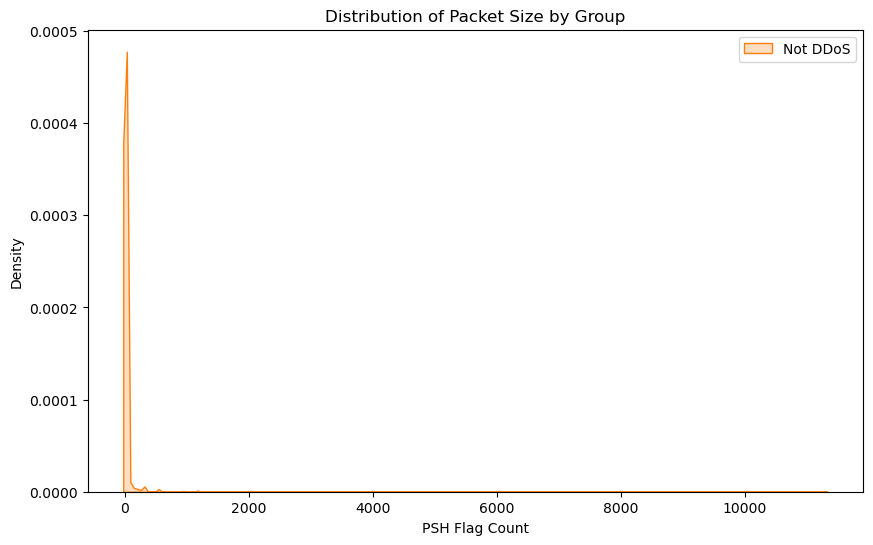

In [45]:
plt.figure(figsize=(10, 6))
sns.kdeplot(DDoS['PSH Flag Count'], label='DDoS', fill=True)
sns.kdeplot(not_DDoS['PSH Flag Count'], label='Not DDoS', fill=True)
plt.title('Distribution of Packet Size by Group')
plt.legend()
plt.show()

KeyboardInterrupt: 

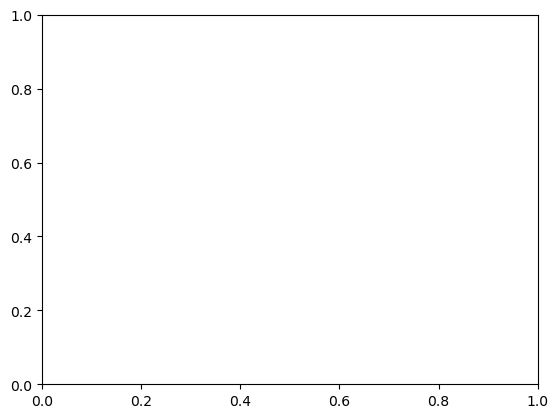

In [44]:
sns.lineplot(merged_df, x='Flow Duration', y='Flow IAT Mean')

<Axes: xlabel='Dst Port', ylabel='Protocol'>

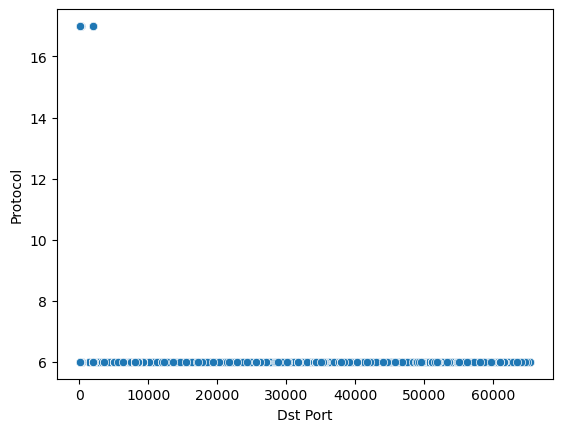

In [4]:
sns.scatterplot(merged_df, x='Dst Port', y='Protocol')

In [88]:
import plotly.express as px
# First, group by country
country_counts = merged_df['Location'].value_counts().reset_index()
country_counts.columns = ['Location', 'Count']
country_counts['LogCount'] = np.log(country_counts['Count'])
fig = px.choropleth(
    country_counts,
    locations="Location",
    locationmode="country names",
    color="LogCount",
    color_continuous_scale="temps",
    #labels={'LogCount':['No Intrusions', 'Low Intrusions', 'Medium Intrusions', 'High Intrusions']}
    title="Global Map of Intrusion Attempts",
    hover_name="Location",
    hover_data={"Count": True, "LogCount": False}
)
fig.show()

In [95]:
merged_df['Idle Max'].value_counts()

Idle Max
1.676196e+15    7
1.675949e+15    6
1.676068e+15    6
1.675701e+15    6
1.675655e+15    5
               ..
1.675760e+15    1
1.675760e+15    1
1.675760e+15    1
1.675760e+15    1
1.676244e+15    1
Name: count, Length: 1731459, dtype: int64

In [81]:
DDoS['Flow Packets/s'].value_counts()

Flow Packets/s
2604.166667    625
4784.688995    623
4807.692308    616
4987.531172    616
4878.048780    613
              ... 
0.126903         1
0.113503         1
0.079410         1
2.463503         1
33.085326        1
Name: count, Length: 1479403, dtype: int64

In [98]:
DDoS['Fwd Packets/s'].value_counts()

Fwd Packets/s
2392.344498    653
1302.083333    645
2493.765586    629
2403.846154    624
2469.135802    619
              ... 
0.153279         1
0.084323         1
0.064389         1
0.069915         1
33.085326        1
Name: count, Length: 1478582, dtype: int64

In [97]:
DDoS['Bwd Packets/s'].value_counts()

Bwd Packets/s
0.000000       1456598
2392.344498        650
2493.765586        644
2403.846154        637
2469.135802        631
                ...   
0.134001             1
0.133273             1
0.133299             1
0.133261             1
510.986203           1
Name: count, Length: 32476, dtype: int64

In [82]:
flow = pd.qcut(DDoS['Flow Packets/s'],3, precision=3)
flow

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning:

invalid value encountered in subtract



ValueError: missing values must be missing in the same location both left and right sides

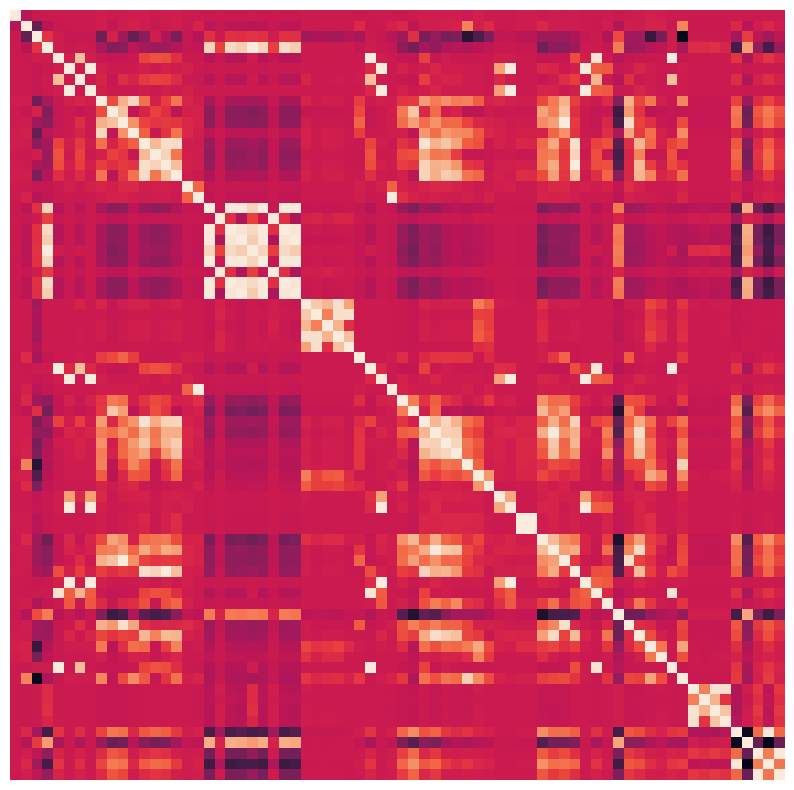

In [11]:

merged_df = merged_df.loc[:, (merged_df != 0).any(axis=0)]
# Generate correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(merged_df.corr(numeric_only=True), cbar=False)

# Remove axis tick labels (column and row names)
plt.xticks([], [])
plt.yticks([], [])

plt.xlabel('')
plt.ylabel('')
plt.title('')  # Optional: Remove the title too
plt.show()

In [5]:
def country_to_continent(country_name: str) -> str:
    try:
        alpha2 = pc.country_name_to_country_alpha2(country_name)
        code = pc.country_alpha2_to_continent_code(alpha2)
        name = pc.convert_continent_code_to_continent_name(code)
        return name
    except Exception:
        return 'Unknown'

merged_df['Continents'] = merged_df['Location'].apply(country_to_continent)
merged_df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,day,Location,Continents
0,129.226.189.21-10.1.0.4-36211-123-17,129.226.189.21,36211,10.1.0.4,123,17,2023-02-05 23:02:50,30009444,3056,4,...,0.0,0.0,1.675638e+15,0.0,1.675638e+15,1.675638e+15,ddospot,5,Hong Kong,Asia
1,129.226.189.21-10.1.0.4-40528-123-17,129.226.189.21,40528,10.1.0.4,123,17,2023-02-05 23:02:50,30018257,3045,4,...,0.0,0.0,1.675638e+15,0.0,1.675638e+15,1.675638e+15,ddospot,5,Hong Kong,Asia
2,129.226.189.21-10.1.0.4-33823-123-17,129.226.189.21,33823,10.1.0.4,123,17,2023-02-05 23:02:50,30010489,3163,4,...,0.0,0.0,1.675638e+15,0.0,1.675638e+15,1.675638e+15,ddospot,5,Hong Kong,Asia
3,129.226.189.21-10.1.0.4-34706-123-17,129.226.189.21,34706,10.1.0.4,123,17,2023-02-05 23:02:50,30013069,3025,4,...,0.0,0.0,1.675638e+15,0.0,1.675638e+15,1.675638e+15,ddospot,5,Hong Kong,Asia
4,129.226.189.21-10.1.0.4-33563-123-17,129.226.189.21,33563,10.1.0.4,123,17,2023-02-05 23:02:50,30016745,3039,4,...,0.0,0.0,1.675638e+15,0.0,1.675638e+15,1.675638e+15,ddospot,5,Hong Kong,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739210,103.162.29.237-10.1.0.4-39559-123-17,103.162.29.237,39559,10.1.0.4,123,17,2023-02-12 23:21:05,37706964,1287,0,...,0.0,0.0,1.676244e+15,0.0,1.676244e+15,1.676244e+15,ddospot,12,Vietnam,Asia
1739211,103.178.228.84-10.1.0.4-26582-123-17,103.178.228.84,26582,10.1.0.4,123,17,2023-02-12 23:21:05,37414115,2755,0,...,0.0,0.0,1.676244e+15,0.0,1.676244e+15,1.676244e+15,ddospot,12,Vietnam,Asia
1739212,103.178.228.60-10.1.0.4-26582-123-17,103.178.228.60,26582,10.1.0.4,123,17,2023-02-12 23:21:05,37307247,1234,0,...,0.0,0.0,1.676244e+15,0.0,1.676244e+15,1.676244e+15,ddospot,12,Vietnam,Asia
1739213,103.178.228.112-10.1.0.4-26582-123-17,103.178.228.112,26582,10.1.0.4,123,17,2023-02-12 23:21:05,37461163,1243,0,...,0.0,0.0,1.676244e+15,0.0,1.676244e+15,1.676244e+15,ddospot,12,Vietnam,Asia


In [18]:
def clean_error_locations(df: pd.DataFrame, col: str = 'Location') -> pd.DataFrame:
    df[col] = df[col].apply(lambda x: 'N/A' if isinstance(x, str) and x.startswith('Error') else x)
    return df
clean_error_locations(merged_df)
merged_df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,day,Location,Continents
0,129.226.189.21-10.1.0.4-36211-123-17,129.226.189.21,36211,10.1.0.4,123,17,2023-02-05 23:02:50,30009444,3056,4,...,0.0,0.0,1.675638e+15,0.0,1.675638e+15,1.675638e+15,ddospot,5,Hong Kong,Asia
1,129.226.189.21-10.1.0.4-40528-123-17,129.226.189.21,40528,10.1.0.4,123,17,2023-02-05 23:02:50,30018257,3045,4,...,0.0,0.0,1.675638e+15,0.0,1.675638e+15,1.675638e+15,ddospot,5,Hong Kong,Asia
2,129.226.189.21-10.1.0.4-33823-123-17,129.226.189.21,33823,10.1.0.4,123,17,2023-02-05 23:02:50,30010489,3163,4,...,0.0,0.0,1.675638e+15,0.0,1.675638e+15,1.675638e+15,ddospot,5,Hong Kong,Asia
3,129.226.189.21-10.1.0.4-34706-123-17,129.226.189.21,34706,10.1.0.4,123,17,2023-02-05 23:02:50,30013069,3025,4,...,0.0,0.0,1.675638e+15,0.0,1.675638e+15,1.675638e+15,ddospot,5,Hong Kong,Asia
4,129.226.189.21-10.1.0.4-33563-123-17,129.226.189.21,33563,10.1.0.4,123,17,2023-02-05 23:02:50,30016745,3039,4,...,0.0,0.0,1.675638e+15,0.0,1.675638e+15,1.675638e+15,ddospot,5,Hong Kong,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739210,103.162.29.237-10.1.0.4-39559-123-17,103.162.29.237,39559,10.1.0.4,123,17,2023-02-12 23:21:05,37706964,1287,0,...,0.0,0.0,1.676244e+15,0.0,1.676244e+15,1.676244e+15,ddospot,12,Vietnam,Asia
1739211,103.178.228.84-10.1.0.4-26582-123-17,103.178.228.84,26582,10.1.0.4,123,17,2023-02-12 23:21:05,37414115,2755,0,...,0.0,0.0,1.676244e+15,0.0,1.676244e+15,1.676244e+15,ddospot,12,Vietnam,Asia
1739212,103.178.228.60-10.1.0.4-26582-123-17,103.178.228.60,26582,10.1.0.4,123,17,2023-02-12 23:21:05,37307247,1234,0,...,0.0,0.0,1.676244e+15,0.0,1.676244e+15,1.676244e+15,ddospot,12,Vietnam,Asia
1739213,103.178.228.112-10.1.0.4-26582-123-17,103.178.228.112,26582,10.1.0.4,123,17,2023-02-12 23:21:05,37461163,1243,0,...,0.0,0.0,1.676244e+15,0.0,1.676244e+15,1.676244e+15,ddospot,12,Vietnam,Asia


KeyError: "'day' is not a known colormap name"

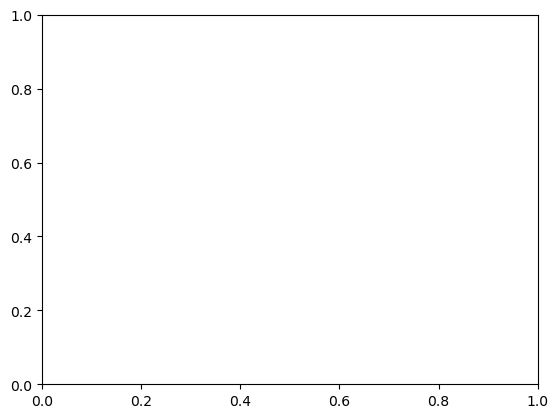

In [24]:
merged_df['Continents'].value_counts().plot(kind='bar')

In [14]:
cont_day = merged_df.groupby('Continents')['day'].value_counts().to_frame()
cont_day

count
Continents    day        
Africa        12     4448
              11     2028
              9      1819
              10     1436
              8       673
              6       200
              7       177
              5        43
Asia          7    444147
              9    285821
              6    150807
              8     97402
              12    33492
              11    29791
              10    26118
              5       734
Europe        9    135881
              7     57748
              8     40275
              11    21115
              10     9582
              12     6961
              6      4694
              5       294
North America 9    141246
              7     60072
              8     51377
              11    32909
              12    27647
              10    24160
              6      4521
              5       611
Oceania       9      1167
              10      828
              11      682
              8       522
              12      478
              7       386
              6       122
              5        19
South America 9      2557
              11     2297
              10     1945
              7      1856
              12     1258
              8       918
              6       350
              5        54
Unknown       9      9813
              11     3618
              8      3326
              7      2758
              10     2234
              12     2019
              6      1584
              5       195

<Axes: ylabel='Location'>

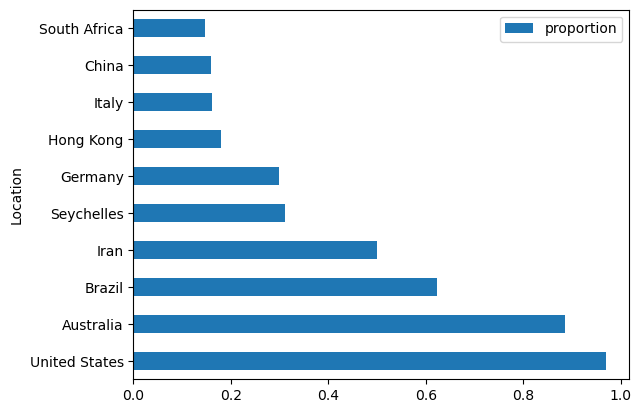

In [42]:
merged_df.loc[merged_df['Location'] == 'The Netherlands', 'Continents'] = 'Europe'
ranks = merged_df.groupby('Continents')['Location'].value_counts(normalize=True).to_frame().reset_index()
ranks = ranks.sort_values(by='proportion', ascending=False)
ranks = ranks[ranks['Continents'] != 'Unknown']
ranks10 = ranks.head(10)
ranks10.plot(kind='barh', x='Location')

In [37]:
ranks10

,Continents,Location,proportion
150,North America,United States,0.969204
181,Oceania,Australia,0.885109
198,South America,Brazil,0.622341
52,Asia,Iran,0.498931
0,Africa,Seychelles,0.310329
101,Europe,Germany,0.299492
53,Asia,Hong Kong,0.178718
102,Europe,Italy,0.162243
54,Asia,China,0.159777
1,Africa,South Africa,0.147173


In [15]:
Asia = ranks[ranks['Continents'] == 'Asia']
Asia

,Continents,Location,proportion
52,Asia,Iran,0.498931
53,Asia,Hong Kong,0.178718
54,Asia,China,0.159777
55,Asia,Japan,0.071388
56,Asia,Singapore,0.032813
57,Asia,Taiwan,0.018418
58,Asia,South Korea,0.011018
59,Asia,Cyprus,0.007107
60,Asia,Kazakhstan,0.003397
61,Asia,India,0.003365


In [11]:
Europe = ranks[ranks['Continents'] == 'Europe']
Europe = Europe.head(5)
Europe

,Continents,Location,proportion
101,Europe,Germany,0.314854
102,Europe,Italy,0.170566
103,Europe,France,0.138977
104,Europe,United Kingdom,0.118423
105,Europe,Poland,0.080322


In [13]:
Africa = ranks[ranks['Continents'] == 'Africa']
Africa

,Continents,Location,proportion
0,Africa,Seychelles,0.310329
1,Africa,South Africa,0.147173
2,Africa,Egypt,0.129435
3,Africa,Mauritius,0.121951
4,Africa,Morocco,0.065503
5,Africa,Tunisia,0.045270
6,Africa,Kenya,0.033444
7,Africa,Algeria,0.026423
8,Africa,Nigeria,0.016260
9,Africa,Ghana,0.012565


In [42]:
Unknown = ranks[ranks['Continents'] == 'Unknown']
Unknown

,Continents,Location,count
210,Unknown,The Netherlands,14186
211,Unknown,N/A,10415
212,Unknown,Unknown Country,903
213,Unknown,DR Congo,11
214,Unknown,U.S. Virgin Islands,9
215,Unknown,Kosovo,7
216,Unknown,Congo Republic,5
217,Unknown,Timor-Leste,4
218,Unknown,"Bonaire, Sint Eustatius, and Saba",2
219,Unknown,St Kitts and Nevis,2


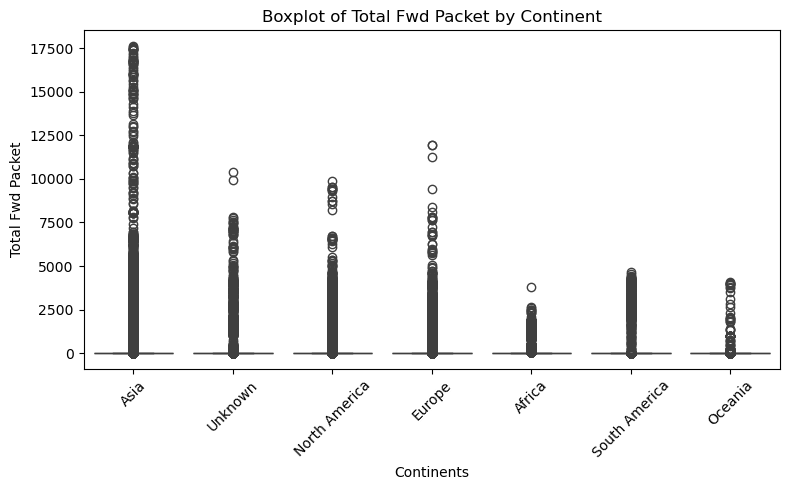

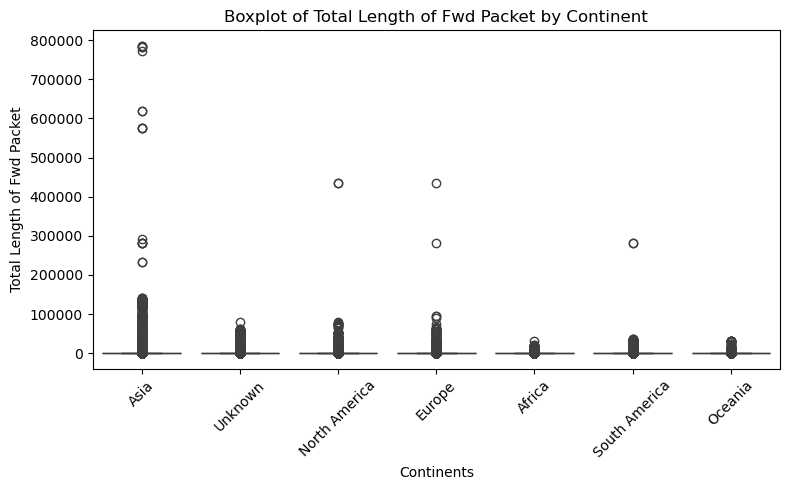

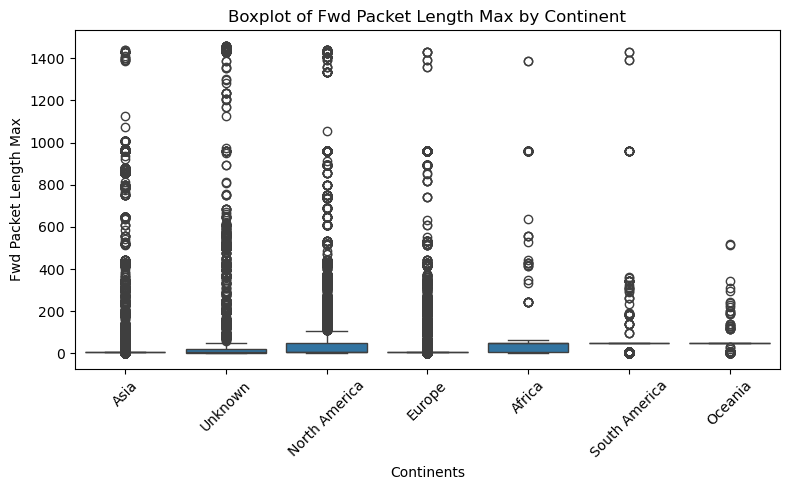

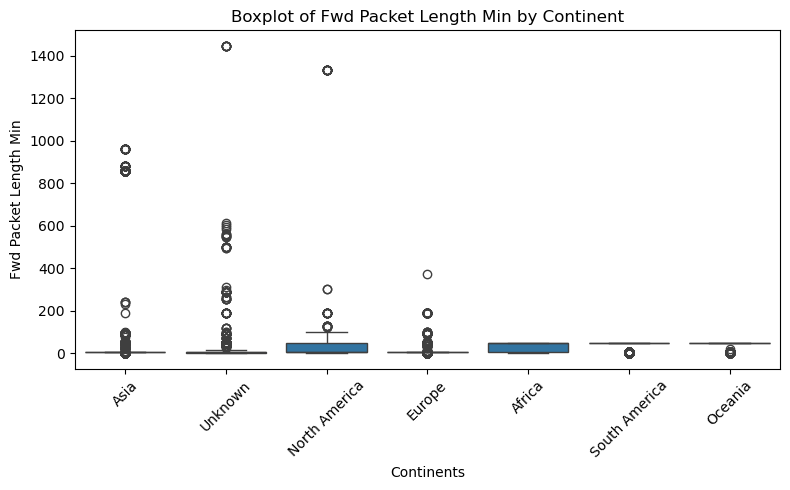

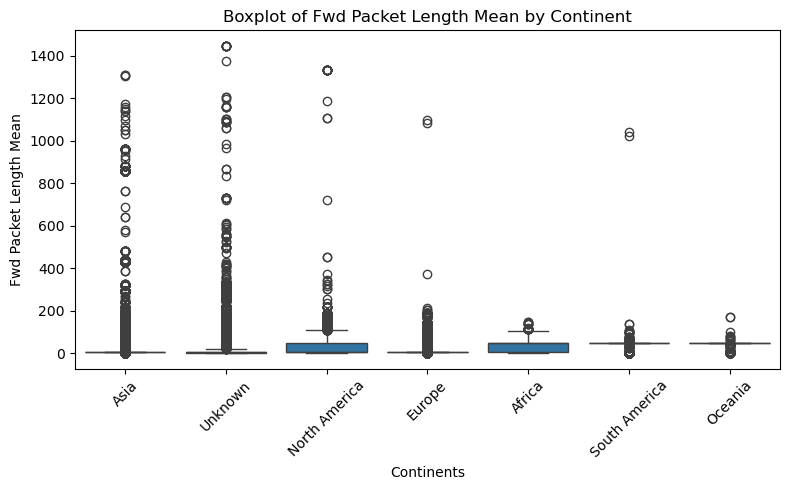

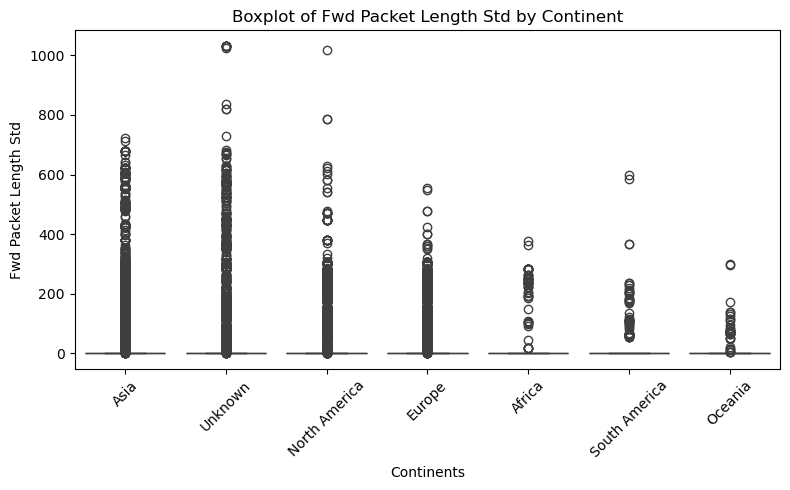

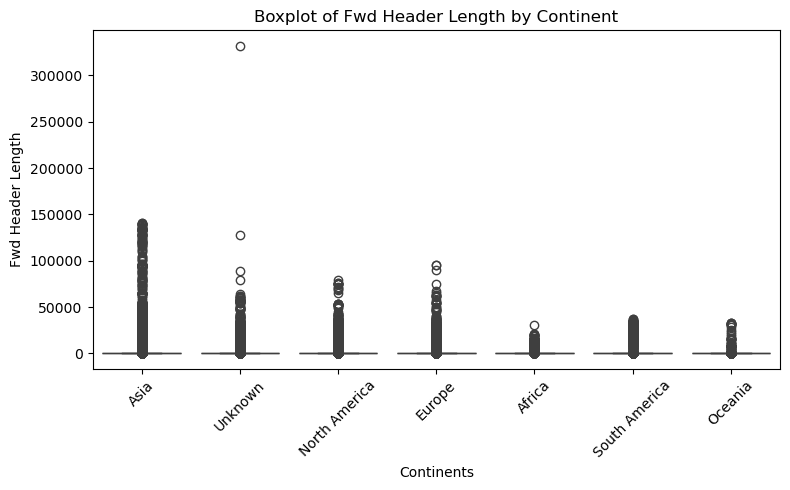

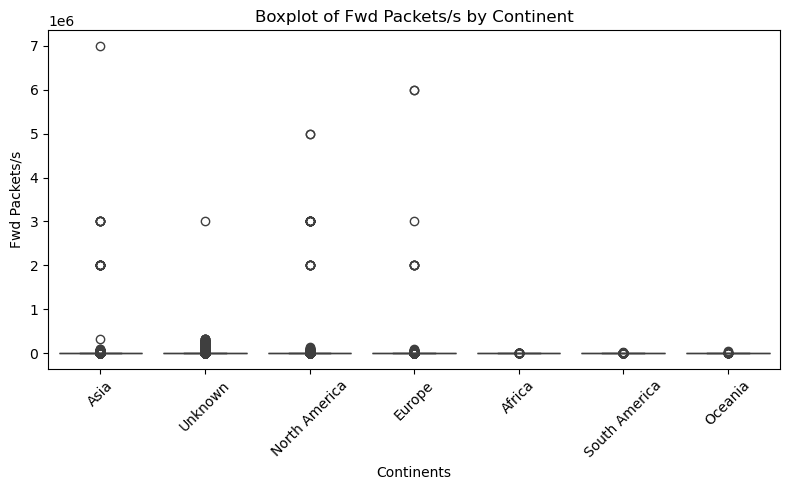

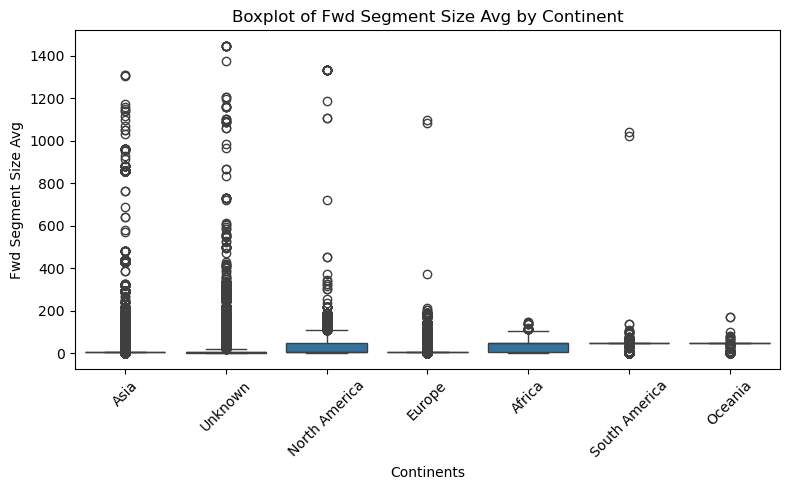

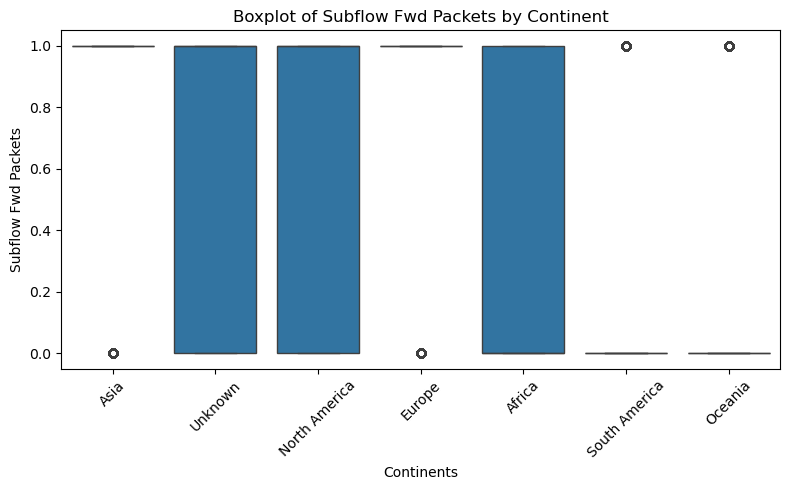

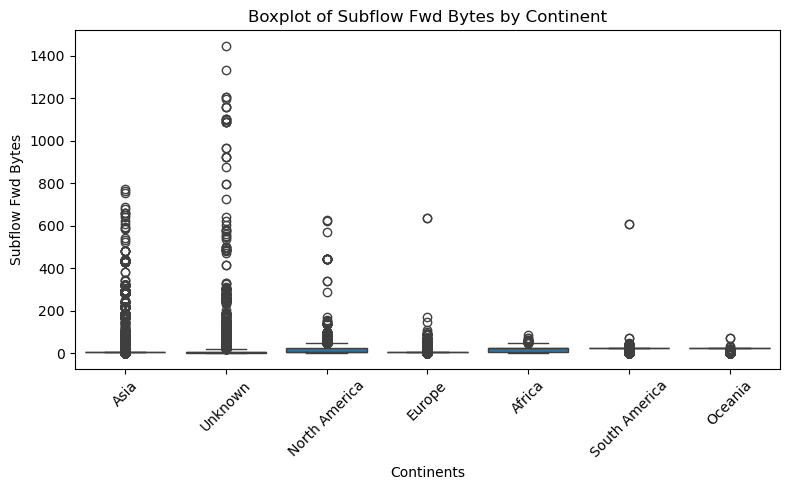

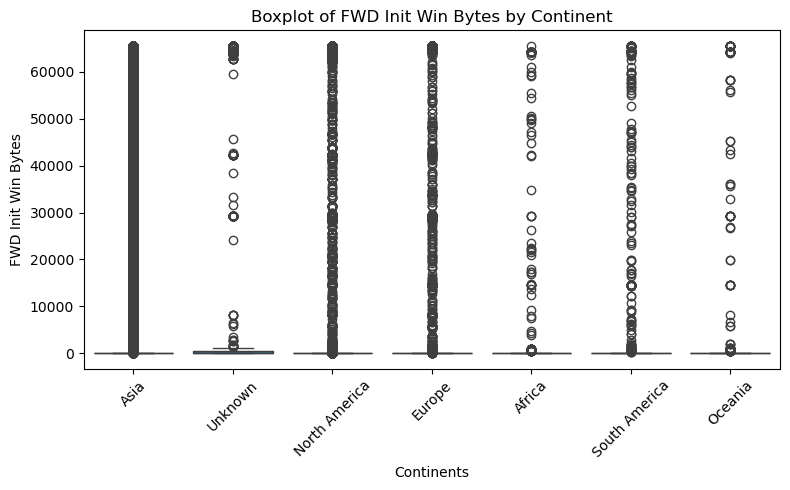

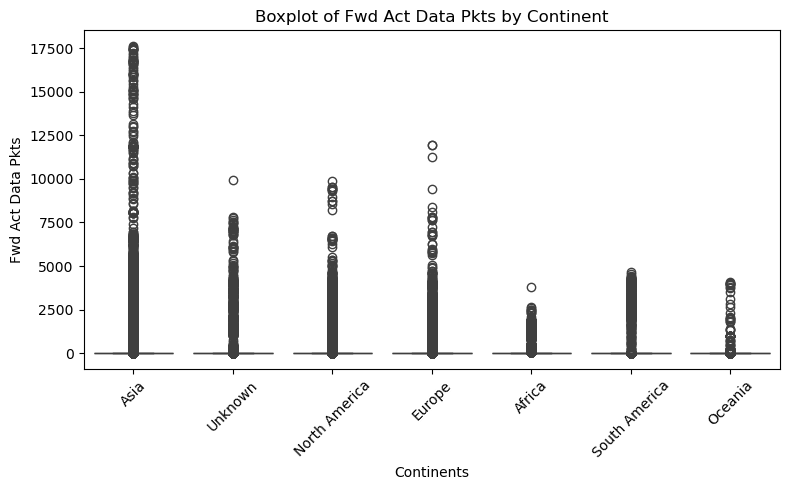

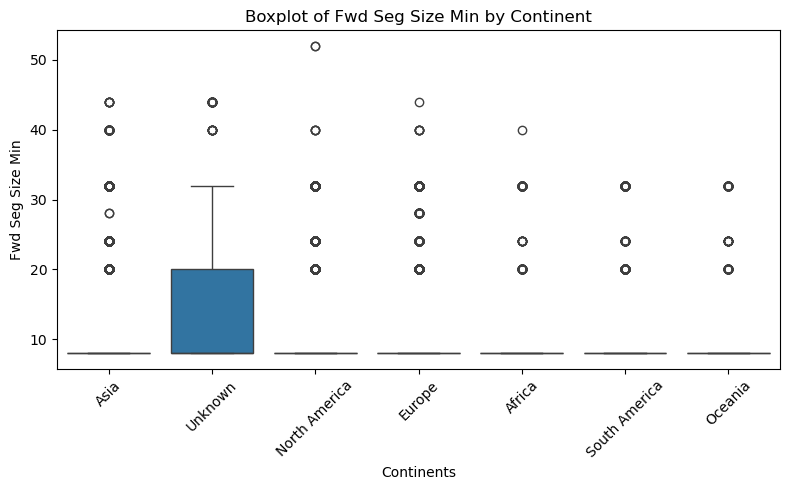

In [55]:
for col in merged_Fwd.columns:
    if col != 'Continents' and merged_Fwd[col].dtype != 'O':  # Exclude 'Continents' and non-numeric
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='Continents', y=col, data=merged_Fwd)
        plt.title(f'Boxplot of {col} by Continent')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

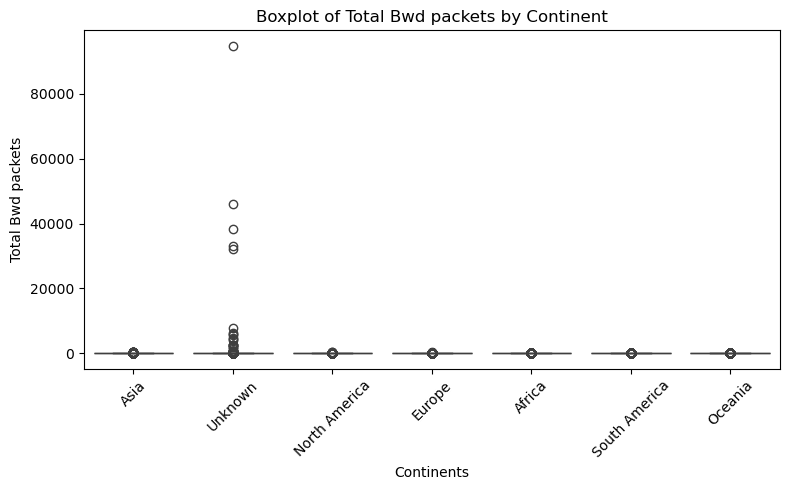

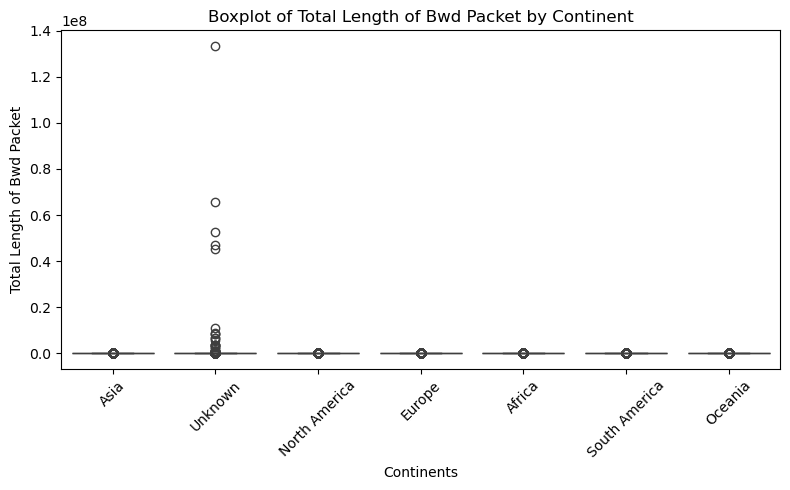

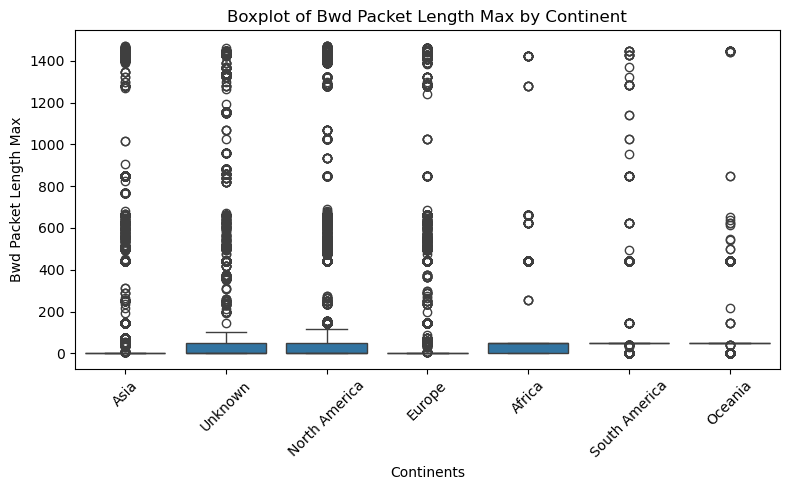

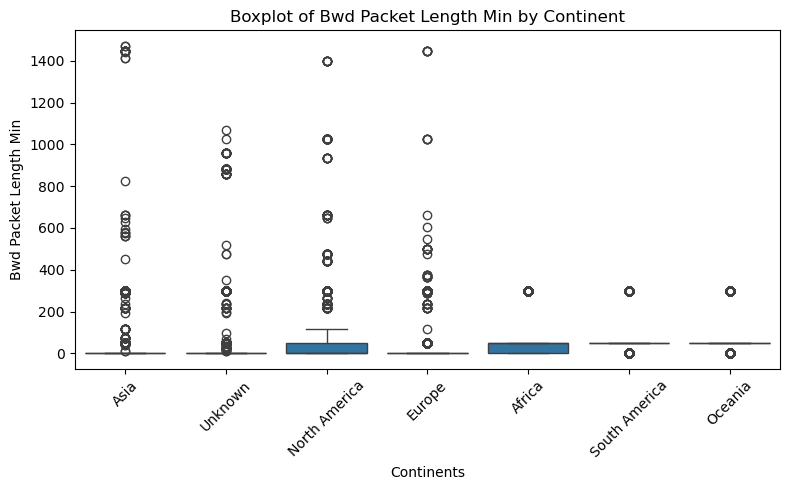

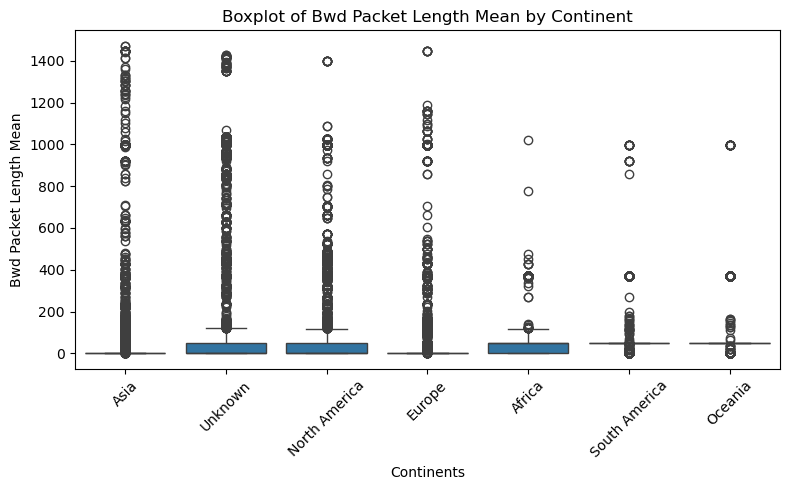

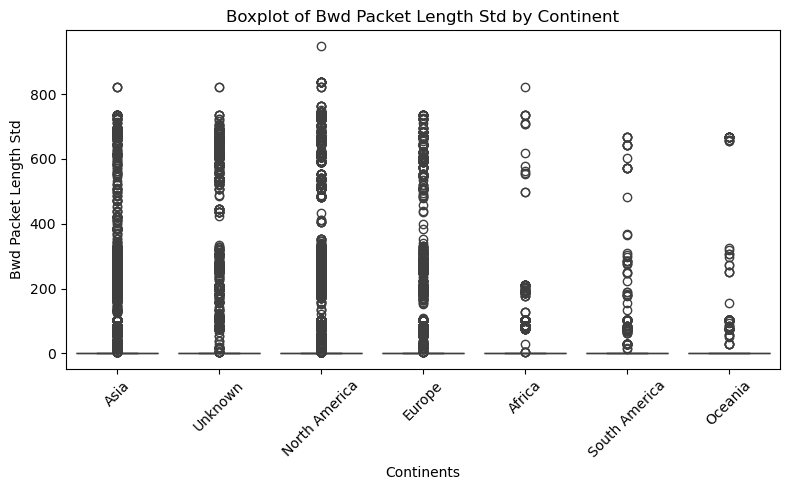

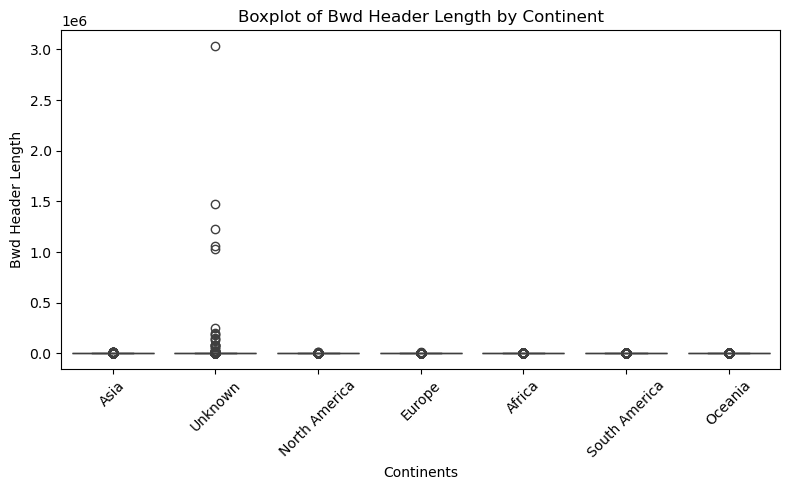

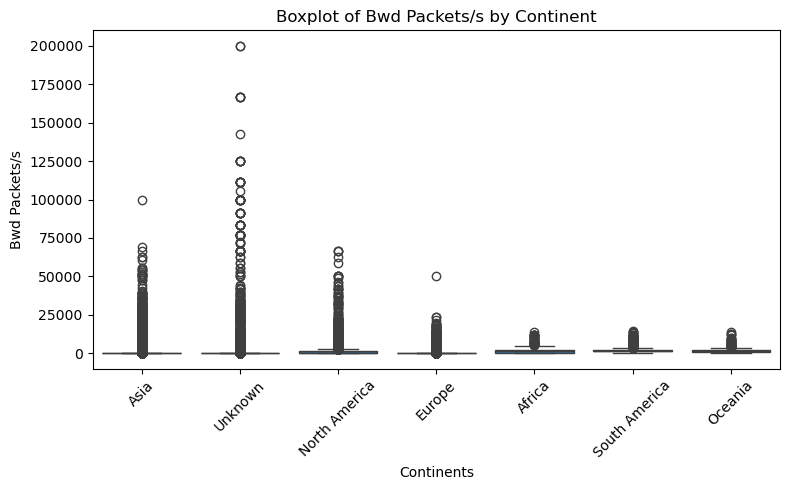

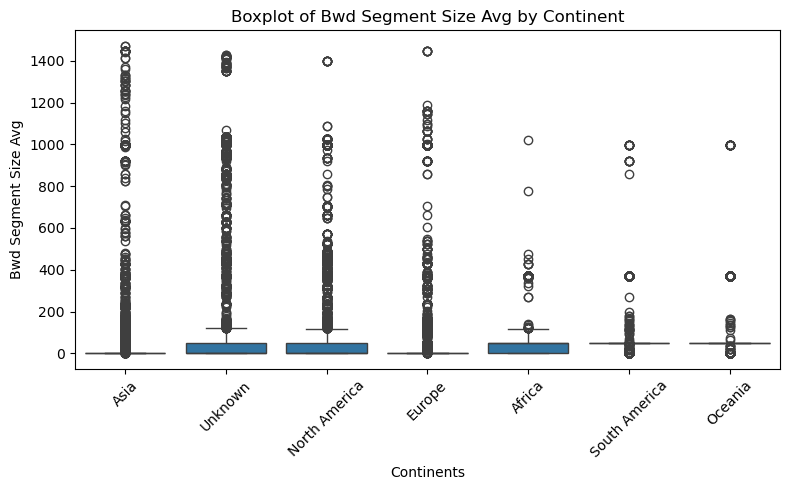

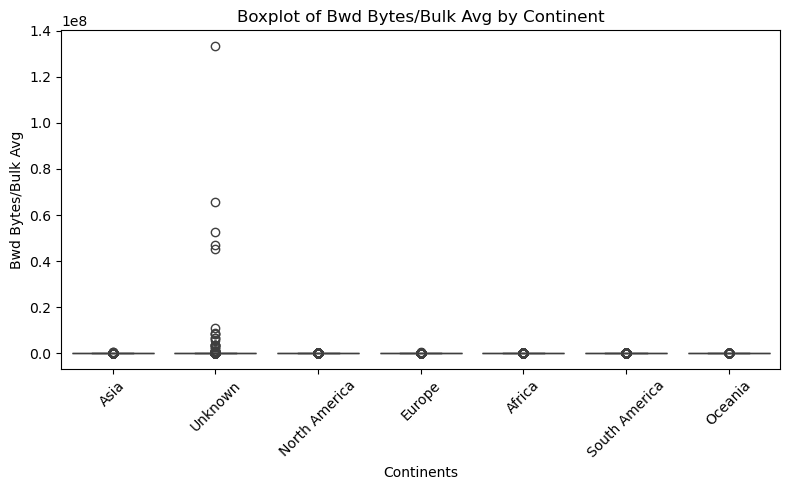

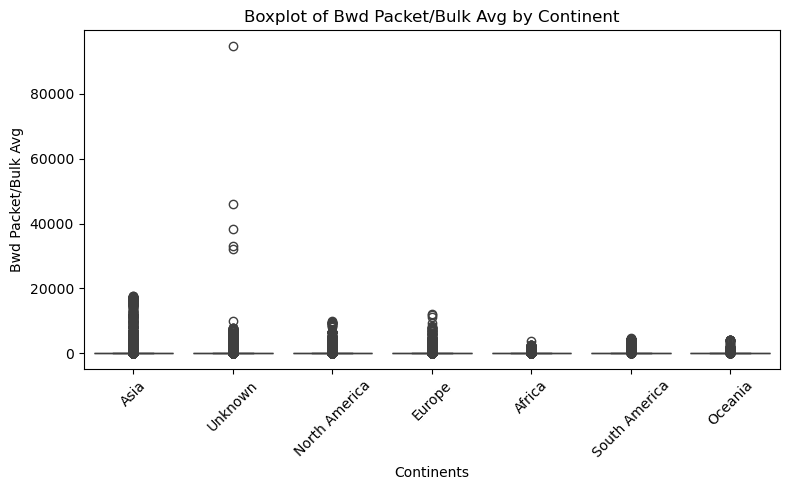

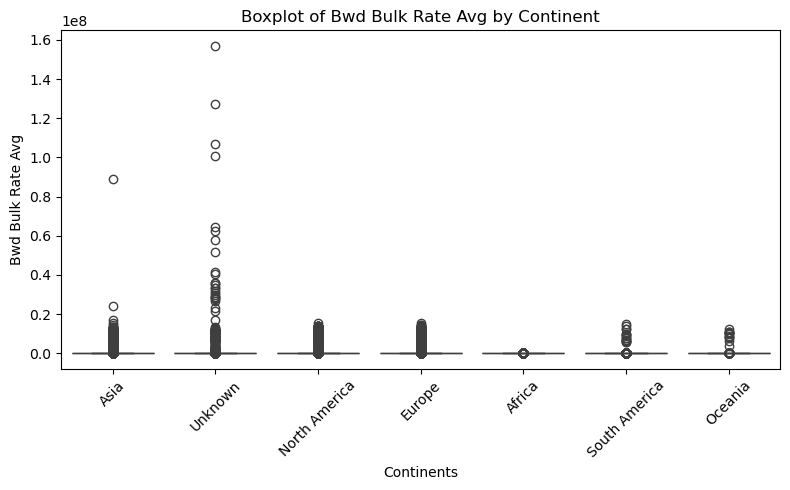

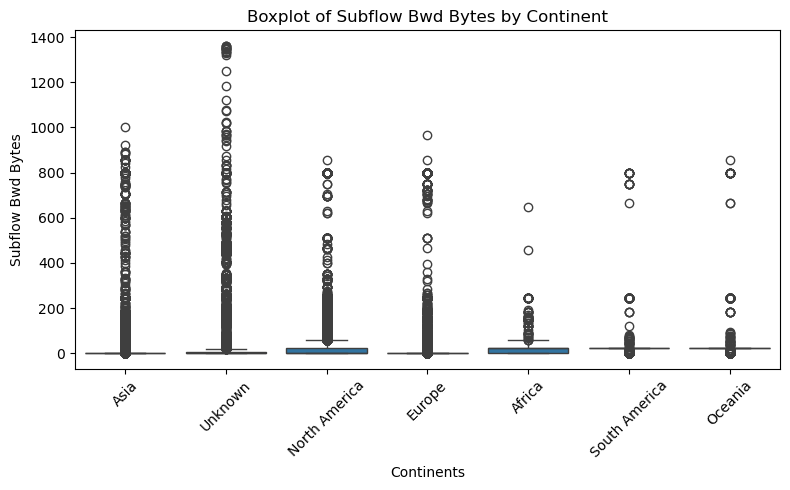

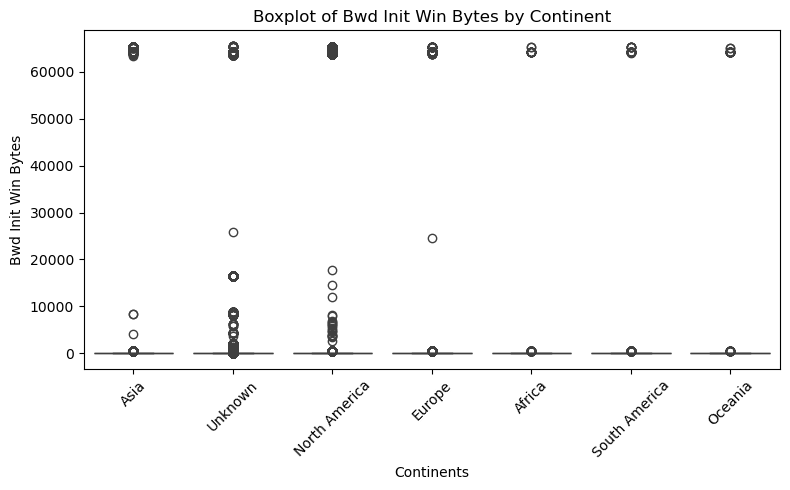

In [57]:
for col in merged_Bwd.columns:
    if col != 'Continents' and merged_Bwd[col].dtype != 'O':  # Exclude 'Continents' and non-numeric
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='Continents', y=col, data=merged_Bwd)
        plt.title(f'Boxplot of {col} by Continent')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [60]:
top_df = merged_df[(merged_df['Location'] == 'Iran') | (merged_df['Location'] == 'United States') | (merged_df['Location'] == 'Hong Kong') | (merged_df['Location'] == 'China') | (merged_df['Location'] == 'Germany') | (merged_df['Location'] == 'Japan') | (merged_df['Location'] == 'Italy') | (merged_df['Location'] == 'France') | (merged_df['Location'] == 'Singapore') | (merged_df['Location'] == 'United Kingdom')]
threshold = 0.98
dropped = []
for col in top_df.columns:
    top_freq = top_df[col].value_counts(normalize=True, dropna=False).iloc[0]
    if top_freq > threshold:
        dropped.append(col)
        top_df = top_df.drop(columns=col)
top_df

,Flow ID,Src IP,Src Port,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,day,float_time,Src #,Location,Continents
0,129.226.189.21-10.1.0.4-36211-123-17,129.226.189.21,36211,2023-02-05 23:02:50,30009444,3056,4,24448.0,1472.0,8.0,...,0.0,1.675638e+15,0.0,1.675638e+15,1.675638e+15,5,23.047222,12922618921,Hong Kong,Asia
1,129.226.189.21-10.1.0.4-40528-123-17,129.226.189.21,40528,2023-02-05 23:02:50,30018257,3045,4,24360.0,1472.0,8.0,...,0.0,1.675638e+15,0.0,1.675638e+15,1.675638e+15,5,23.047222,12922618921,Hong Kong,Asia
2,129.226.189.21-10.1.0.4-33823-123-17,129.226.189.21,33823,2023-02-05 23:02:50,30010489,3163,4,25304.0,1472.0,8.0,...,0.0,1.675638e+15,0.0,1.675638e+15,1.675638e+15,5,23.047222,12922618921,Hong Kong,Asia
3,129.226.189.21-10.1.0.4-34706-123-17,129.226.189.21,34706,2023-02-05 23:02:50,30013069,3025,4,24200.0,1472.0,8.0,...,0.0,1.675638e+15,0.0,1.675638e+15,1.675638e+15,5,23.047222,12922618921,Hong Kong,Asia
4,129.226.189.21-10.1.0.4-33563-123-17,129.226.189.21,33563,2023-02-05 23:02:50,30016745,3039,4,24312.0,1472.0,8.0,...,0.0,1.675638e+15,0.0,1.675638e+15,1.675638e+15,5,23.047222,12922618921,Hong Kong,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739202,36.156.28.131-10.1.0.4-52748-161-6,36.156.28.131,52748,2023-02-12 23:20:01,66,1,1,0.0,0.0,0.0,...,0.0,1.676244e+15,0.0,1.676244e+15,1.676244e+15,12,23.333611,3615628131,China,Asia
1739203,172.254.82.45-10.1.0.4-33190-23-6,172.254.82.45,33190,2023-02-12 23:20:26,123,1,1,0.0,0.0,0.0,...,0.0,1.676244e+15,0.0,1.676244e+15,1.676244e+15,12,23.340556,1722548245,United States,North America
1739205,45.136.12.26-10.1.0.4-19211-123-17,45.136.12.26,19211,2023-02-12 23:21:04,19783704,1192,0,9536.0,0.0,8.0,...,0.0,1.676244e+15,0.0,1.676244e+15,1.676244e+15,12,23.351111,451361226,Hong Kong,Asia
1739206,45.136.12.26-10.1.0.4-21363-123-17,45.136.12.26,21363,2023-02-12 23:21:04,19781062,1213,0,9704.0,0.0,8.0,...,0.0,1.676244e+15,0.0,1.676244e+15,1.676244e+15,12,23.351111,451361226,Hong Kong,Asia


In [1]:
merged_df['Continent'].value_counts()

NameError: name 'merged_df' is not defined